# UK Smoking Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df = pd.read_csv('smoking.csv')

### Exploring the data

In [2]:
df.shape

(1691, 13)

In [3]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
df.tail()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets
1690,1691,Male,31,Married,Degree,Scottish,White,"10,400 to 15,600",Scotland,No,NaN,NaN,NaN


**There are NaN values in the amt_weekends and amt_weekdays columns that I will need to deal with whilst cleaning the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [6]:
df.isna().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

**There are a lot of missing values in the last 3 columns that I need to clean**

In [7]:
df.duplicated().sum()

np.int64(0)

**No duplicates within this data**

In [8]:
df['type'] = df['type'].fillna('Non-smoker')

### Cleaning the data

**Replaced the NaN values in the 'type' column to 'Non-smoker'**

In [9]:
df[['amt_weekends', 'amt_weekdays']] = df[['amt_weekends', 'amt_weekdays']].fillna(0)

In [10]:
df.isna().sum()

Unnamed: 0               0
gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64

**Replaced all NaN values in the data successfully**

In [11]:
df[['amt_weekends', 'amt_weekdays']] = df[['amt_weekends', 'amt_weekdays']].astype(int)

**Changed the data type for 'amt_weekends', 'amt_weekdayd' to integer as it records cigarettes in whole numbers**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
 12  type                   1691 non-null   object
dtypes: int64(4), object(9)
memory usage: 171.9+ KB


In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

**Dropped an unecessary column**

In [14]:
df.tail()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,0,0,Non-smoker
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20,20,Hand-Rolled
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,0,0,Non-smoker
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20,20,Packets
1690,Male,31,Married,Degree,Scottish,White,"10,400 to 15,600",Scotland,No,0,0,Non-smoker


**Data successfully cleaned**

### Visualisation and Analysis

In [15]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0,0,Non-smoker
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12,12,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0,0,Non-smoker
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0,0,Non-smoker
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0,0,Non-smoker


In [16]:
gender = df['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,965
1,Male,726


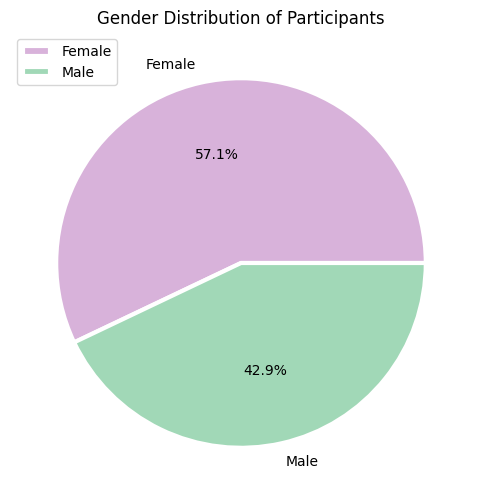

In [17]:
colors=['#d8b2da','#a1d8b7']
plt.figure(figsize=(6,6))
plt.pie(gender['count'], labels=gender['gender'], autopct='%1.1f%%', wedgeprops = {'linewidth':3, 'edgecolor':'white'}, colors=colors)
plt.axixs=('equal')
plt.legend(loc = 'upper left')
plt.title('Gender Distribution of Participants')
plt.show()

In [18]:
non_smokers = df[df['smoke'] == 'No']
smokers = df[df['smoke'] == 'Yes']

In [19]:
gender_smokers = smokers['gender'].value_counts().reset_index()
gender_smokers

,gender,count
0,Female,234
1,Male,187


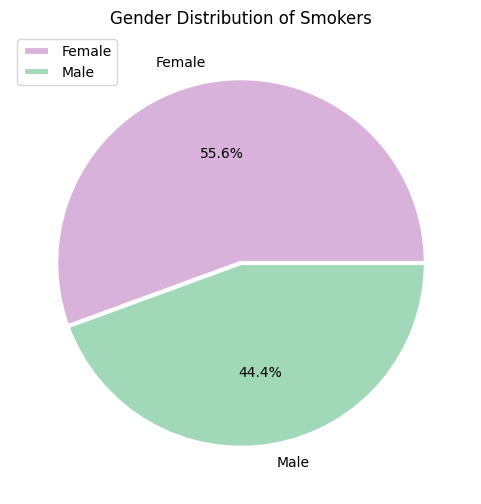

In [20]:
colors=['#d8b2da','#a1d8b7']
plt.figure(figsize=(6,6))
plt.pie(gender_smokers['count'], labels=gender['gender'], autopct='%1.1f%%', wedgeprops = {'linewidth':3, 'edgecolor':'white'}, colors=colors)
plt.axixs=('equal')
plt.legend(loc = 'upper left')
plt.title('Gender Distribution of Smokers')
plt.show()

**In this study, women smoke more than men**

In [21]:
non_smokers_marital_status=non_smokers['marital_status'].value_counts().reset_index()
non_smokers_marital_status

,marital_status,count
0,Married,669
1,Single,269
2,Widowed,183
3,Divorced,103
4,Separated,46


In [22]:
smokers_marital_status = smokers['marital_status'].value_counts().reset_index()
smokers_marital_status

,marital_status,count
0,Single,158
1,Married,143
2,Divorced,58
3,Widowed,40
4,Separated,22


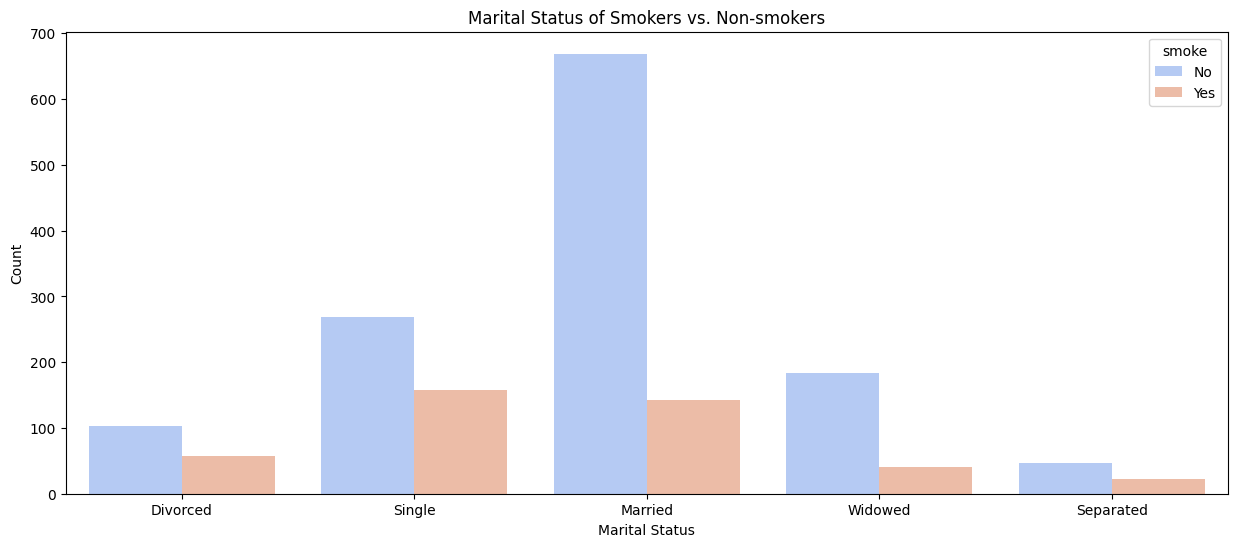

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x='marital_status', hue='smoke', data=df, palette = 'coolwarm')
plt.title('Marital Status of Smokers vs. Non-smokers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

**Majority of non-smokers are married, and majority of smokers are single**

#### Highest Qualifications

In [24]:
non_smokers_highest_qualification=non_smokers['highest_qualification'].value_counts().reset_index()
non_smokers_highest_qualification

,highest_qualification,count
0,No Qualification,449
1,Degree,223
2,GCSE/O Level,203
3,Higher/Sub Degree,98
4,Other/Sub Degree,96
5,A Levels,84
6,GCSE/CSE,64
7,ONC/BTEC,53


In [25]:
smokers_highest_qualification=smokers['highest_qualification'].value_counts().reset_index()
smokers_highest_qualification

,highest_qualification,count
0,No Qualification,137
1,GCSE/O Level,105
2,Degree,39
3,GCSE/CSE,38
4,Other/Sub Degree,31
5,Higher/Sub Degree,27
6,ONC/BTEC,23
7,A Levels,21


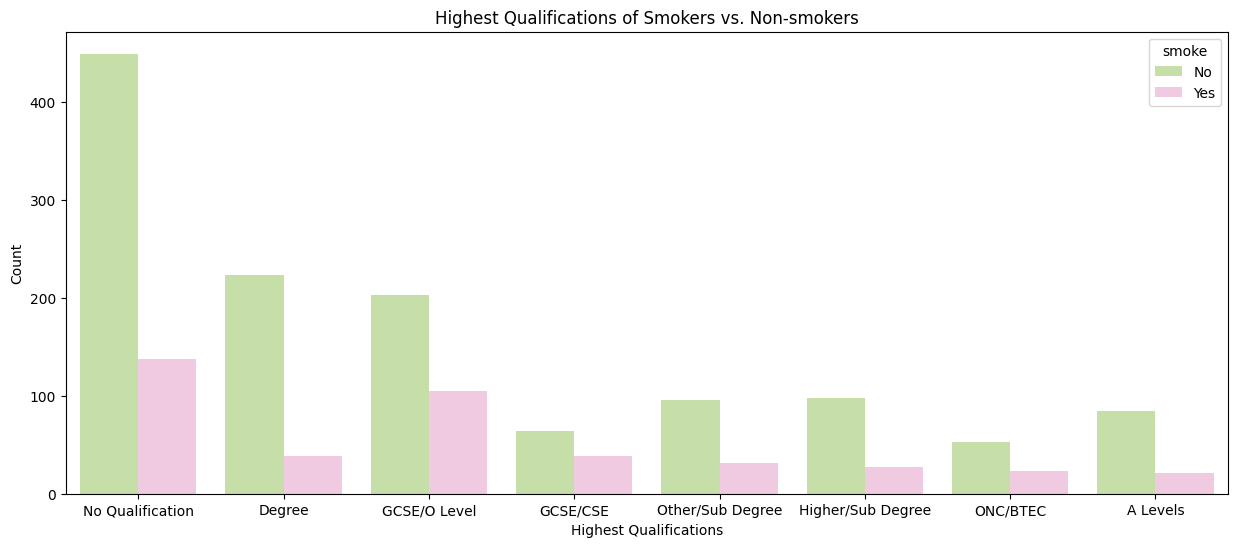

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x='highest_qualification', hue='smoke', data=df, palette = 'PiYG_r')
plt.title('Highest Qualifications of Smokers vs. Non-smokers')
plt.xlabel('Highest Qualifications')
plt.ylabel('Count')
plt.show()

**In this study, majority of both smokers and non-smokers have no qualifications. More non-smokers have degrees than smokers**

#### Nationalities

In [27]:
non_smokers_nationality=non_smokers['nationality'].value_counts().reset_index()
non_smokers_nationality

,nationality,count
0,English,631
1,British,409
2,Scottish,97
3,Other,57
4,Welsh,50
5,Refused,14
6,Irish,12


In [28]:
smokers_nationality=smokers['nationality'].value_counts().reset_index()
smokers_nationality

,nationality,count
0,English,202
1,British,129
2,Scottish,45
3,Welsh,16
4,Other,14
5,Irish,11
6,Refused,3
7,Unknown,1


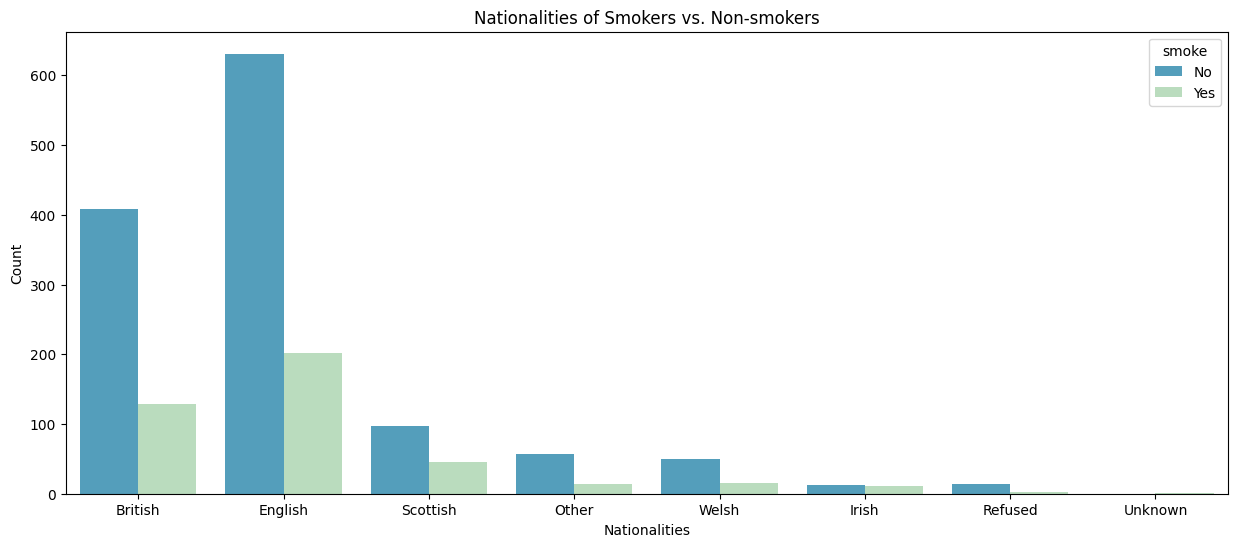

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x='nationality', hue='smoke', data=df, palette = 'GnBu_r')
plt.title('Nationalities of Smokers vs. Non-smokers')
plt.xlabel('Nationalities')
plt.ylabel('Count')
plt.show()

**Englist is the most frequent nationality overall**

#### Ethnicities

In [30]:
non_smokers_ethnicity=non_smokers['ethnicity'].value_counts().reset_index()
non_smokers_ethnicity

,ethnicity,count
0,White,1170
1,Asian,33
2,Black,26
3,Chinese,22
4,Mixed,9
5,Refused,9
6,Unknown,1


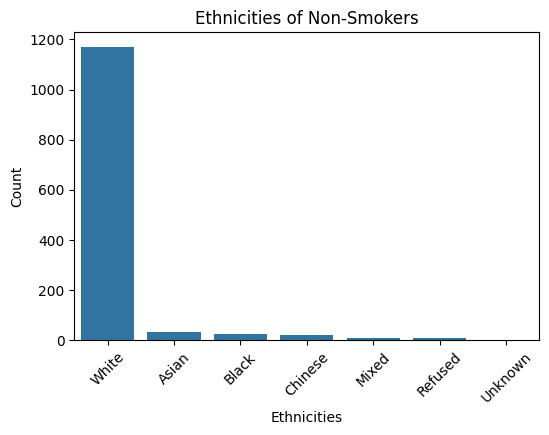

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x='ethnicity', y='count', data=non_smokers_ethnicity)
plt.title('Ethnicities of Non-Smokers')
plt.xlabel('Ethnicities')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [32]:
smokers_ethnicity=smokers['ethnicity'].value_counts().reset_index()
smokers_ethnicity

,ethnicity,count
0,White,390
1,Asian,8
2,Black,8
3,Mixed,5
4,Chinese,5
5,Refused,4
6,Unknown,1


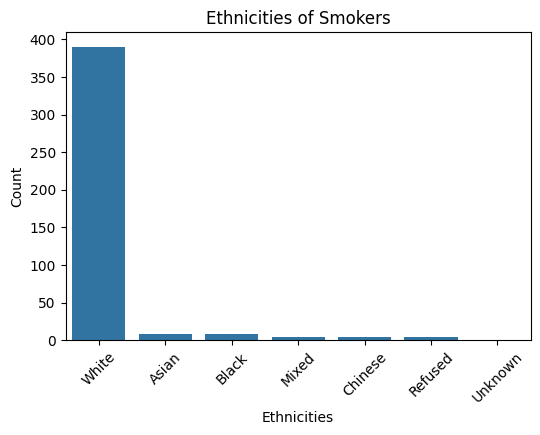

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x='ethnicity', y='count', data=smokers_ethnicity)
plt.title('Ethnicities of Smokers')
plt.xlabel('Ethnicities')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

**Most non-smokers and smokers are white by a huge amount**

#### Regions

In [34]:
region = df['region'].value_counts().reset_index()
region

,region,count
0,Midlands & East Anglia,443
1,The North,426
2,South East,252
3,London,182
4,South West,157
5,Scotland,148
6,Wales,83


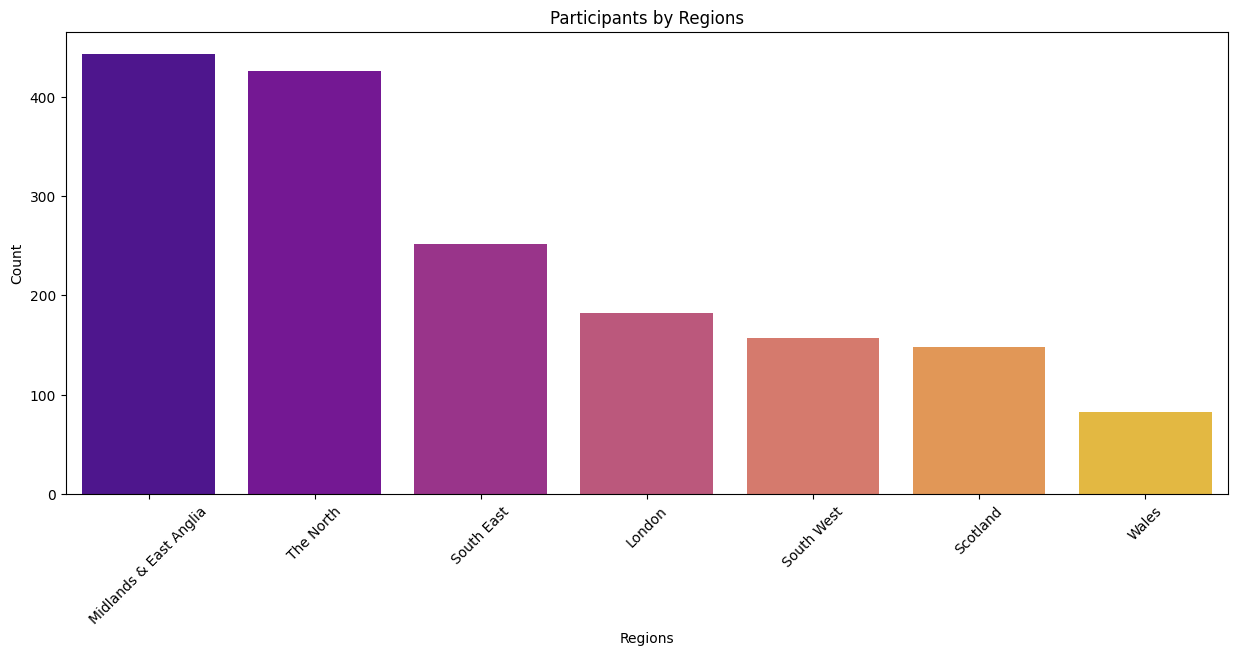

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x='region', y='count', hue='region', data=region, palette = 'plasma')
plt.title('Participants by Regions')
plt.xlabel('Regions')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [36]:
non_smokers_region=non_smokers['region'].value_counts().reset_index()
non_smokers_region

,region,count
0,Midlands & East Anglia,351
1,The North,325
2,South East,187
3,London,132
4,South West,115
5,Scotland,97
6,Wales,63


In [37]:
smokers_region=smokers['region'].value_counts().reset_index()
smokers_region

,region,count
0,The North,101
1,Midlands & East Anglia,92
2,South East,65
3,Scotland,51
4,London,50
5,South West,42
6,Wales,20


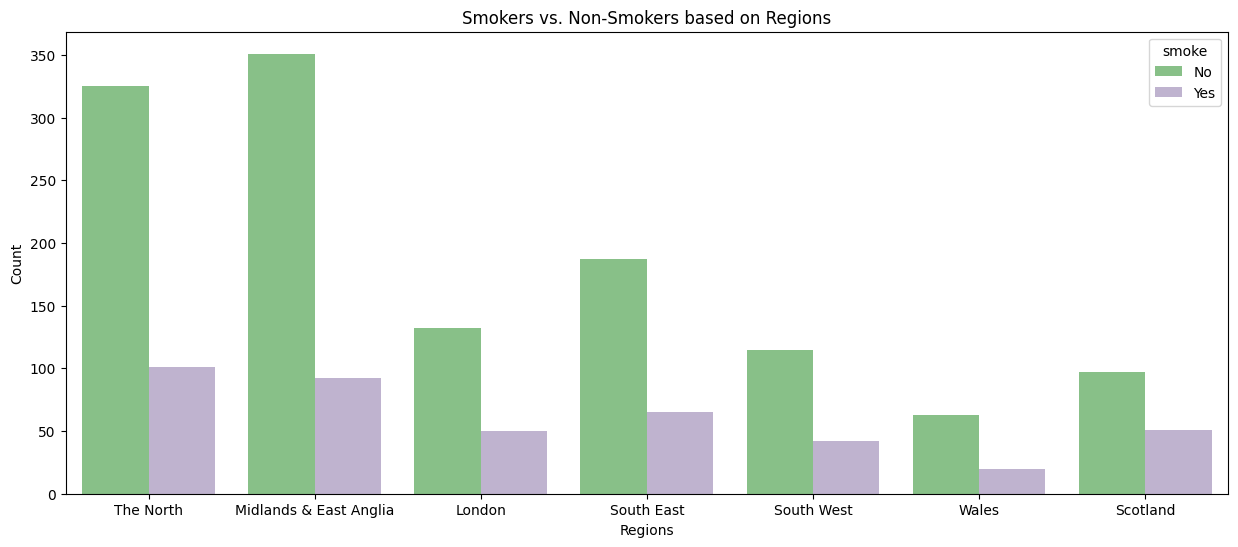

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(x='region', hue='smoke', data=df, palette = 'Accent')
plt.title('Smokers vs. Non-Smokers based on Regions')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.show()

**Midlands & East Anglia have the most non-smokers. North has the most smokers**

#### Smoking type

In [39]:
smoking_type = smokers['type'].value_counts().reset_index() 
smoking_type

,type,count
0,Packets,297
1,Hand-Rolled,72
2,Both/Mainly Packets,42
3,Both/Mainly Hand-Rolled,10


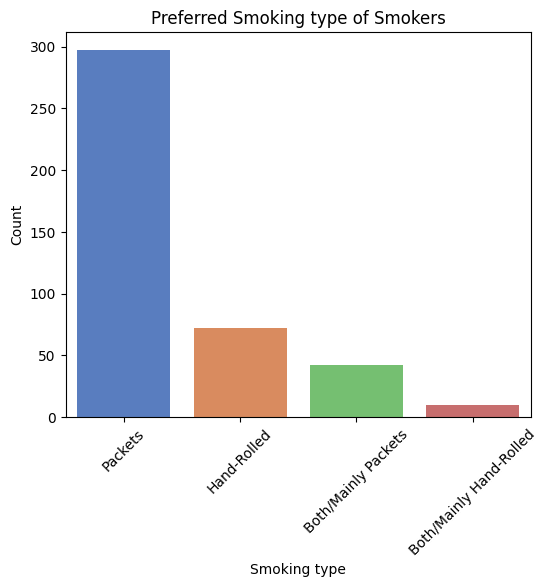

In [40]:
plt.figure(figsize=(6,5))
sns.barplot(x='type', y='count', hue='type', data=smoking_type, palette = 'muted')
plt.title('Preferred Smoking type of Smokers')
plt.xlabel('Smoking type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

**Amongst smokers, their preferred way to smoke is by using packets**

#### Gross Income

In [41]:
gross_income = df['gross_income'].value_counts().reset_index()
gross_income

,gross_income,count
0,"5,200 to 10,400",396
1,"10,400 to 15,600",268
2,"2,600 to 5,200",257
3,"15,600 to 20,800",188
4,"20,800 to 28,600",155
5,"Under 2,600",133
6,Refused,108
7,"Above 36,400",89
8,"28,600 to 36,400",79
9,Unknown,18


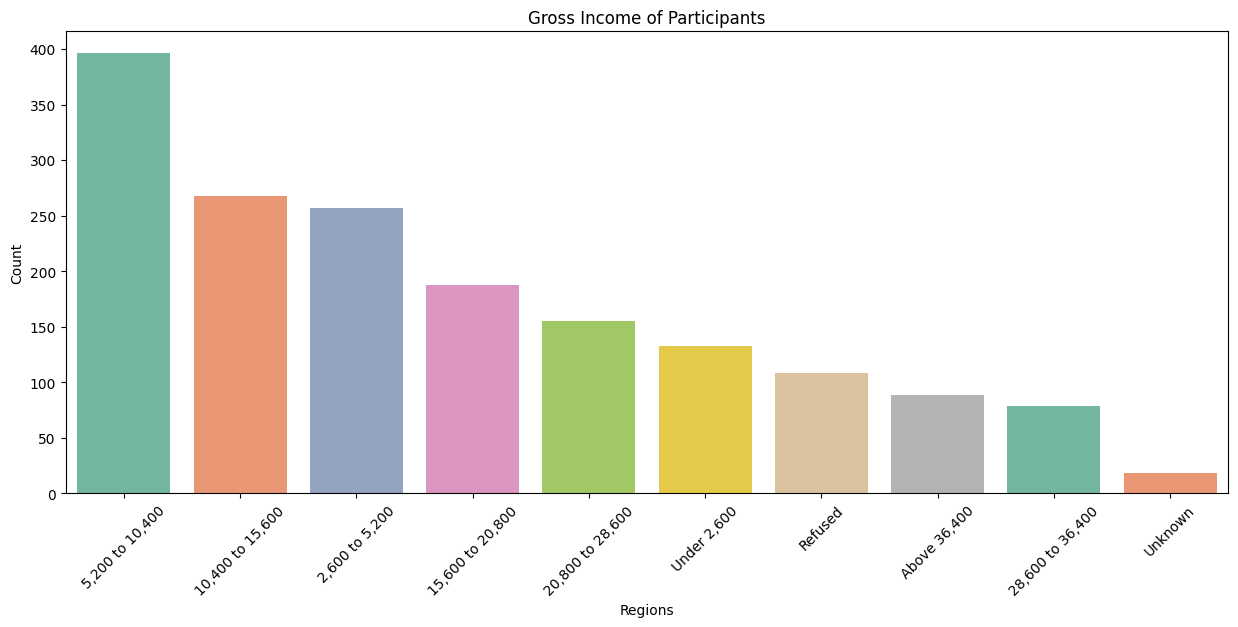

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='gross_income', y='count', hue='gross_income', data=gross_income, palette = 'Set2')
plt.title('Gross Income of Participants')
plt.xlabel('Regions')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [43]:
smoker_gross_income = smokers['gross_income'].value_counts().reset_index()
smoker_gross_income

,gross_income,count
0,"5,200 to 10,400",107
1,"10,400 to 15,600",83
2,"2,600 to 5,200",64
3,"15,600 to 20,800",45
4,"20,800 to 28,600",38
5,"Under 2,600",36
6,Refused,21
7,"Above 36,400",15
8,"28,600 to 36,400",9
9,Unknown,3


In [44]:
non_smoker_gross_income = non_smokers['gross_income'].value_counts().reset_index()
non_smoker_gross_income

,gross_income,count
0,"5,200 to 10,400",289
1,"2,600 to 5,200",193
2,"10,400 to 15,600",185
3,"15,600 to 20,800",143
4,"20,800 to 28,600",117
5,"Under 2,600",97
6,Refused,87
7,"Above 36,400",74
8,"28,600 to 36,400",70
9,Unknown,15


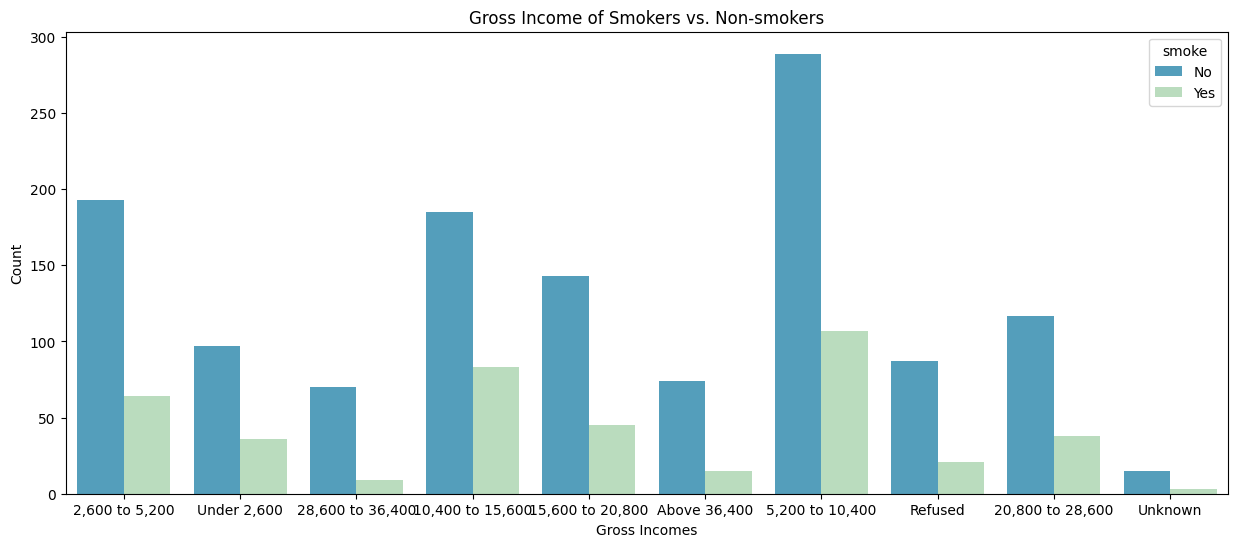

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x='gross_income', hue='smoke', data=df, palette = 'GnBu_r')
plt.title('Gross Income of Smokers vs. Non-smokers')
plt.xlabel('Gross Incomes')
plt.ylabel('Count')
plt.show()

**Majority of both smokers and non-smokes fall into the 5,200 to 10,400 income threshold.**

#### Age Distribution

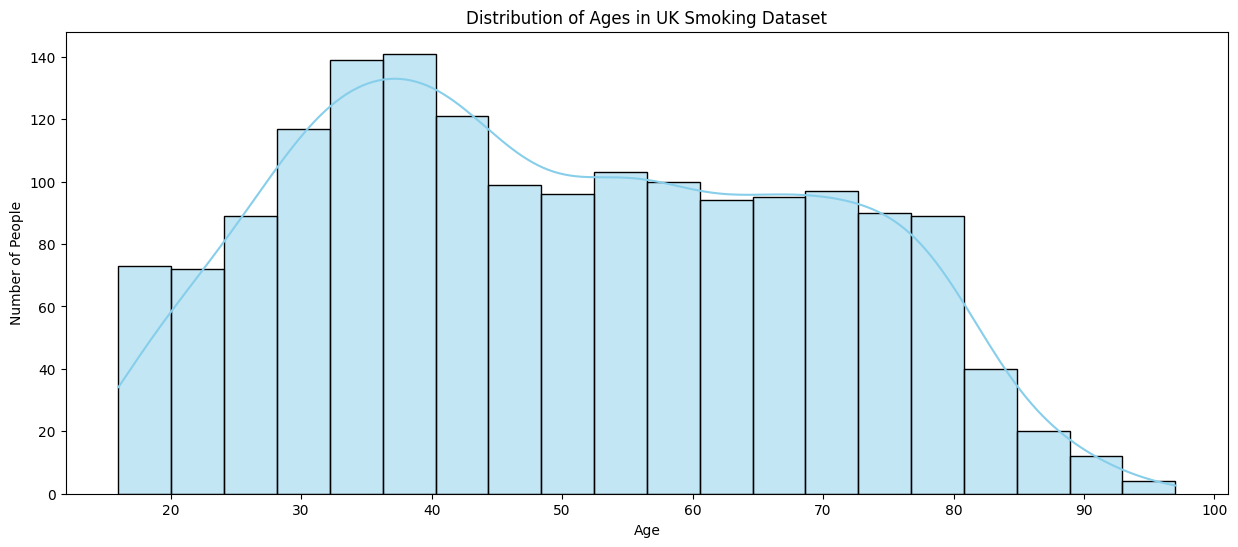

In [47]:
plt.figure(figsize=(15,6))
sns.histplot(x='age', bins=20, kde=True,data=df, color='skyblue')
plt.title('Distribution of Ages in UK Smoking Dataset')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

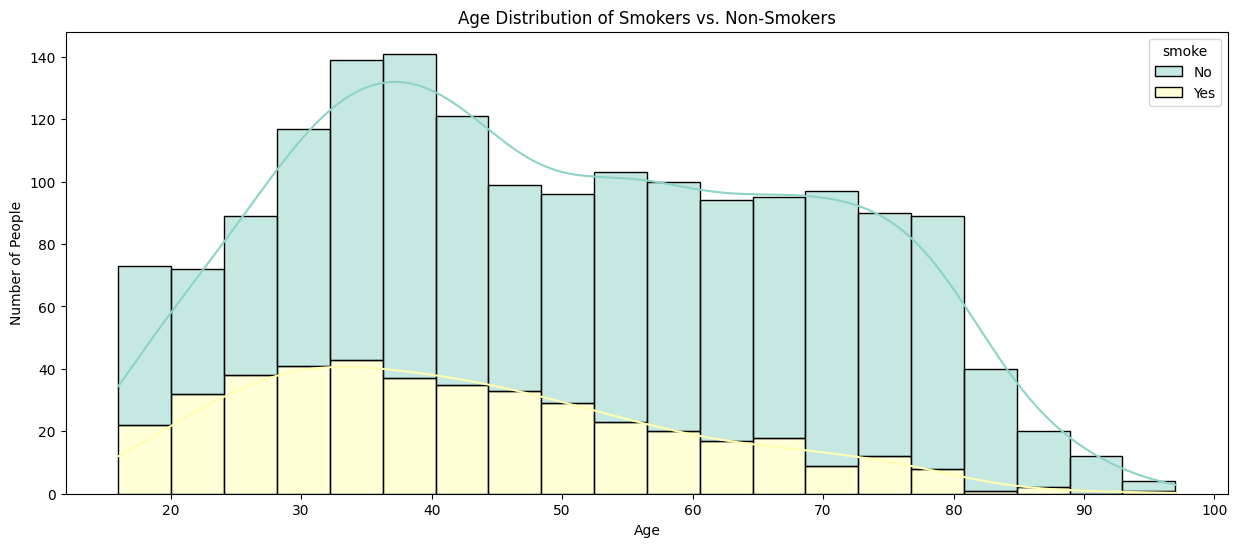

In [50]:
plt.figure(figsize=(15,6))
sns.histplot(x='age', bins=20, kde=True, hue='smoke', multiple='stack', data=df, palette='Set3')
plt.title('Age Distribution of Smokers vs. Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

#### Amount smoked throughout the week

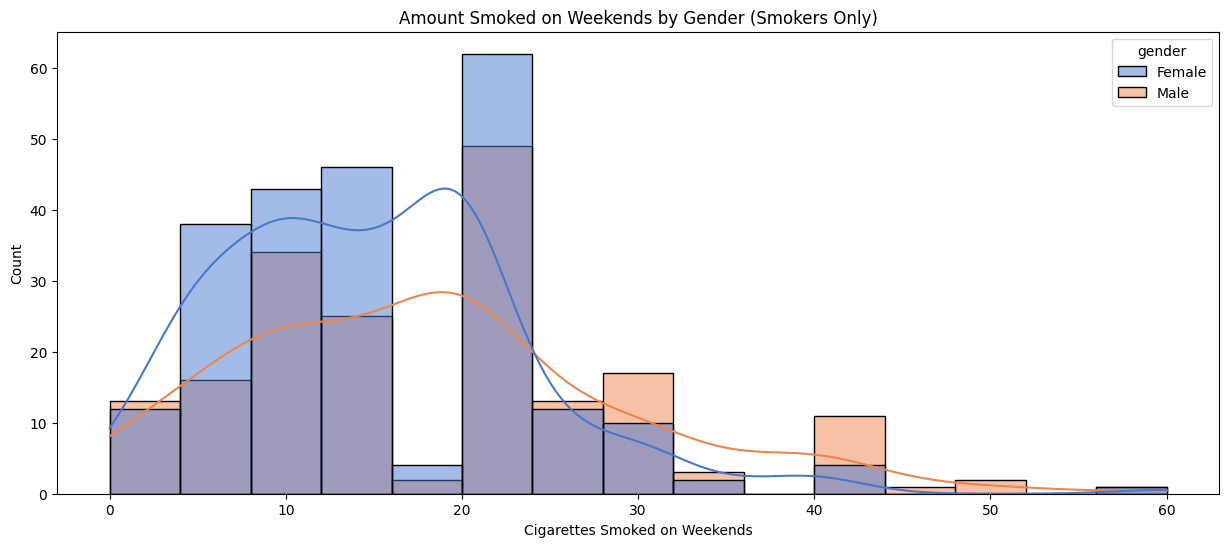

In [59]:
plt.figure(figsize=(15, 6))
sns.histplot(data=smokers, x='amt_weekends', hue='gender', kde=True, bins=15, palette='muted')
plt.title('Amount Smoked on Weekends by Gender (Smokers Only)')
plt.xlabel('Cigarettes Smoked on Weekends')
plt.ylabel('Count')
plt.show()

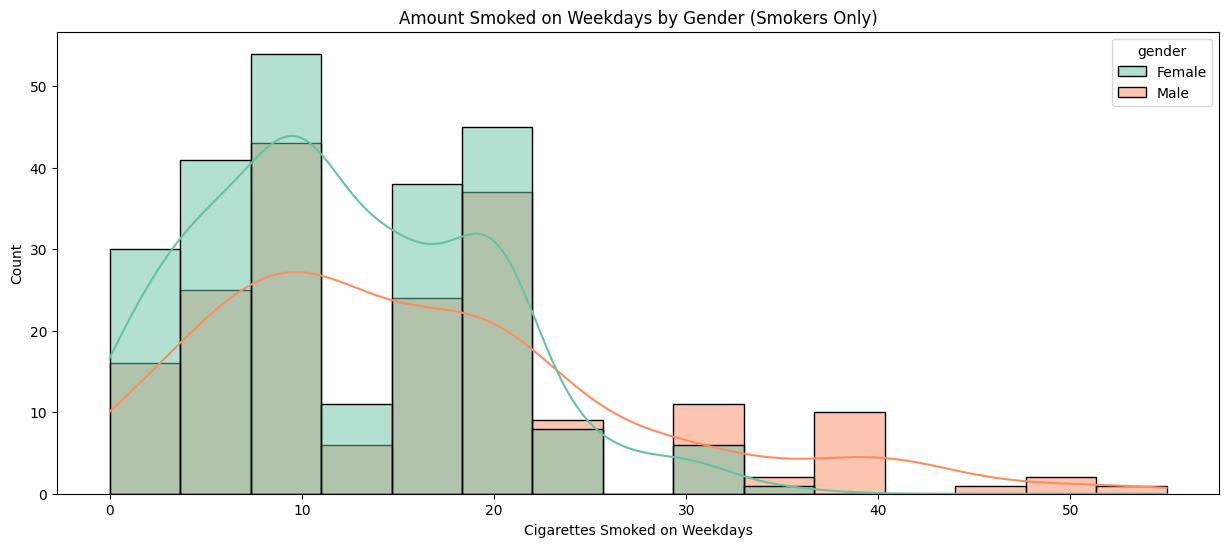

In [63]:
plt.figure(figsize=(15, 6))
sns.histplot(data=smokers, x='amt_weekdays', hue='gender', kde=True, bins=15, palette='Set2')
plt.title('Amount Smoked on Weekdays by Gender (Smokers Only)')
plt.xlabel('Cigarettes Smoked on Weekdays')
plt.ylabel('Count')
plt.show()